# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%config IPCompleter.greedy=True

In [2]:
# Import dataset
# Your code here
df = pd.read_csv("./data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
df = df.sample(5000)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9033 to 18355
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [4]:
# Let's take a look at first 5 rows ()
# Your code here
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9033,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20023,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26658,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30648,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [5]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
# Your code here
df['label'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label']).values
y = df['label'].values

In [7]:
y

array([6, 4, 0, ..., 4, 8, 9])

In [8]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)
print(X_train.shape)
print(X_test.shape)

(3750, 784)
(1250, 784)


## 2. Visualization

Label:  3


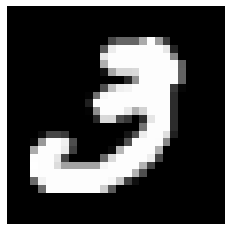

In [9]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
index = 34
print("Label: ", str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

## 3. Modeling

In [10]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
dtc = DecisionTreeClassifier(max_depth=4)
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [11]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(dtc, X_train, y_train, cv =5, n_jobs=-1)

array([0.56308101, 0.56515957, 0.59946595, 0.56074766, 0.54752343])

In [21]:
cross_val_score(rfc, X_train, y_train, cv =5, n_jobs=-1)

array([0.86188579, 0.86702128, 0.85714286, 0.85580774, 0.84872825])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict

## 4. Evaluate model

In [14]:
def validateFunc(y_pred):
    print("Accuracy score: ", accuracy_score(y_test, y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))
    print("Report: \n", classification_report(y_test, y_pred))

In [16]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
rfc_y_pred = rfc.predict(X_test)
validateFunc(rfc_y_pred)

Accuracy score:  0.8912
Confusion matrix: 
 [[116   0   2   0   0   0   1   0   0   0]
 [  1 124   2   0   0   0   0   0   1   0]
 [  1   0 111   2   0   1   2   4   7   1]
 [  1   0   2 110   0   4   0   0   3   0]
 [  2   4   0   0 122   2   2   1   0   8]
 [  4   1   0  11   0  92   1   1   0   0]
 [  3   1   4   0   0   1 119   0   1   0]
 [  0   7   3   0   1   1   0 116   2   2]
 [  2   1   6   4   1   2   0   2 108   3]
 [  1   2   0   3   8   0   0   2   1  96]]
Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       119
           1       0.89      0.97      0.93       128
           2       0.85      0.86      0.86       129
           3       0.85      0.92      0.88       120
           4       0.92      0.87      0.89       141
           5       0.89      0.84      0.86       110
           6       0.95      0.92      0.94       129
           7       0.92      0.88      0.90       132
           8       0.88     

In [17]:
# Decision Tree model
# Your code here
dtc_y_pred = dtc.predict(X_test)
validateFunc(dtc_y_pred)

Accuracy score:  0.5464
Confusion matrix: 
 [[ 94   0   1   1   0   7   6   6   4   0]
 [  0 104   1   1   8   0   4   0   8   2]
 [  7   7  49   5   2   1  12   0  14  32]
 [  4   4   2  43   1  23   3   0  26  14]
 [  1   1   0   0  85   0  12   3   3  36]
 [ 13   1   0   2   8  40   6   3   1  36]
 [  3   2  11   0  16   9  62   0   3  23]
 [  7   4   0   0   9   0   2  65   4  41]
 [  0  10   1   3   5   5   5   0  51  49]
 [  1   1   0   1   4   1   7   0   8  90]]
Report: 
               precision    recall  f1-score   support

           0       0.72      0.79      0.76       119
           1       0.78      0.81      0.79       128
           2       0.75      0.38      0.51       129
           3       0.77      0.36      0.49       120
           4       0.62      0.60      0.61       141
           5       0.47      0.36      0.41       110
           6       0.52      0.48      0.50       129
           7       0.84      0.49      0.62       132
           8       0.42     

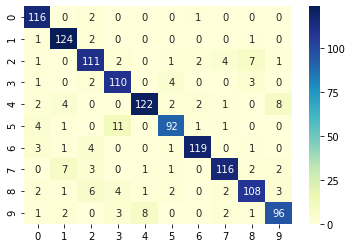

In [19]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here
sns.heatmap(confusion_matrix(y_test,rfc_y_pred),cmap="YlGnBu", annot=True, fmt="d")

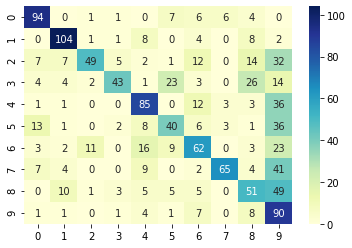

In [20]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here
sns.heatmap(confusion_matrix(y_test,dtc_y_pred),cmap="YlGnBu", annot=True, fmt="d")

## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

[0.6416, 0.8192, 0.876, 0.9136, 0.9368, 0.9352, 0.944, 0.9496]


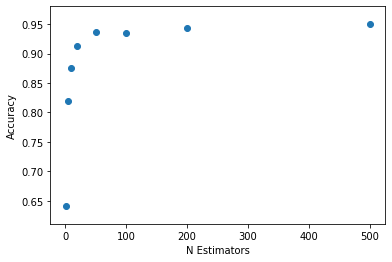

In [24]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n,result)
plt.xlabel("N Estimators")
plt.ylabel("Accuracy")
print(result)

### Grid search

In [23]:
from sklearn.model_selection import GridSearchCV

max_depths = [10, 20, 30]
min_samples_leafs = [10, 20, 30]
min_samples_splits = [10, 20, 30]

param_grid = {
    'max_depth': max_depths,
    'min_samples_leaf': min_samples_leafs,
    'min_samples_split': min_samples_splits
}

decision_tree_grid = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    scoring='f1', 
    verbose=10, 
    n_jobs=-1, 
    cv=5)

decision_tree_grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(decision_tree_grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = decision_tree_grid.cv_results_['mean_test_score']
stds = decision_tree_grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, decision_tree_grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, decision_tree_grid.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Great job!